# Linear Regression using Gradient Descent with TensorFlow

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(1) 
tf.set_random_seed(1) 

In [3]:
ds = np.load("proyecto_training_data.npy")

In [4]:
### First 80% of dataset used as training set
ds_train = ds[:int(len(ds)*0.8),0:7]
print(np.shape(ds_train))

(1168, 6)


In [5]:
## Last 20% of dataset used as test set. 
ds_test = ds[int(len(ds)*0.8):int(len(ds)),0:7]
print(np.shape(ds_test))

(292, 6)


In [6]:
x= ds_train[:,1]
y= ds_train[:,0]
n = len(x) # Number of data points

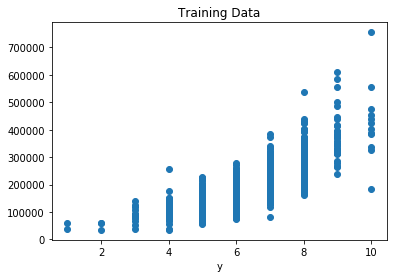

In [7]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [38]:
tf.reset_default_graph()

In [39]:
##placeholders
##constantes y placeholders son nodos. por constantes nos referimos a informacion constante. 
## un placeholder es un nodo vacio, que toma valor hasta que en la sesion ejecutemos el grafo. 
X = tf.placeholder("float") 
Y = tf.placeholder("float")

#trainable variables defined randomly
W = tf.Variable(np.random.randn(), name = "W") 
#W = tf.Variable(500.0, name = "W")
b = tf.Variable(np.random.randn(), name = "b")
#b = tf.Variable(1240.0, name = "b")

#Hyperparameters
learning_rate = 0.0001
training_epochs = 1000

# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

#
disturbance = tf.summary.scalar(name = "Costfunction", tensor = cost)

In [40]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

#
disturbance = tf.summary.scalar(name = "Costfunction", tensor = cost)

In [41]:

# Starting the Tensorflow Session 
with tf.Session() as sess: 
    
      
    # Initializing the Variables 
    #ejecutar los nodos 
    sess.run(init)
   
   
    writer = tf.summary.FileWriter( './linear_regression_graphs/lr_0.0001', sess.graph)
    
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 

        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(disturbance, feed_dict = {X : x, Y : y}) 
            writer.add_summary(c,epoch)
            #print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    #training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    #weight = sess.run(W) 
    #bias = sess.run(b) 
    
    

In [13]:
 Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


In [44]:
# Plotting the Results 
#plt.plot(x, y, 'ro', label ='Original data') 
#plt.plot(x, predictions, label ='Fitted line') 
#plt.title('Linear Regression Result') 
#plt.legend() 
#plt.show() 

## Cost function using a LR of 10
<img src="./error_graphs/lr_10.png"> 

## Cost function using a LR of 1
<img src="./error_graphs/lr_1.png"> 

## Cost function using a LR of 0.1
<img src="./error_graphs/lr_0.1.png"> 

## Cost function using a LR of 0.01
<img src="./error_graphs/lr_0.01.png"> 

## Cost function using a LR of 0.001
<img src="./error_graphs/lr_.001.png"> 

## Cost function using a LR of 0.0001
<img src="./error_graphs/lr_0.0001.png"> 

# Conclusions

A linear regression model using gradient descent was implemented using 1000 epochs and different learning rates.
Using learning rates of 10, 1 and 0.1 didn't show positive results, as error oscilated and did not converged to a certain value.

At a learning rate of 0.01 we can see error started to decrease almost linearly down to a value of 1.24e+9
At a learning rate of 0.001 and 0.0001 error converged to values near of 1.4e+9 and 2e+9

We can see that a the model with a learning rate of 0.01 minimized the error. This is surprising, as I was expecting a better model with a smaller learning rate. However, error did not converged as fast as it was decreased.

The model with the learning rate of 0.01 is the best model.